In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
def prepare_datasets(corpus, labels, test_data_proportion=0.3, random_state=42):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
                                                        test_size=test_data_proportion,
                                                        random_state=random_state)
    return train_X, test_X, train_Y, test_Y

In [3]:
def tfidf_extractor(corpus, ngram_range=(1,2)):
    vectorizer = TfidfVectorizer(min_df=1,
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [4]:
df = pd.read_csv('sentiment_2000.csv')
df.head(10)

,content,sentimen
0,capres mahfud md optimistis ppp parlemen tahun...,1
1,cawapres koalisi perubahan muhaimin iskandar c...,1
2,capres koalisi pdip ganjar pranowo khawatir su...,1
3,capres ganjar pranowo mengaku khawatir preside...,1
4,capres koalisi perubahan anies baswedan presid...,1
5,capres koalisi perubahan anies baswedan mengak...,1
6,cawapres koalisi indonesia maju kim gibran rak...,1
7,capres koalisi perubahan anies baswedan menarg...,1
8,capres koalisi indonesia maju prabowo subianto...,1
9,capres koalisi perubahan anies baswedan mengun...,1


In [5]:
# Split data
x_train, x_test, y_train, y_test = prepare_datasets(df['content'], df['sentimen'], test_data_proportion=0.3)

In [6]:
# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure the lengths match after splitting
y_train_encoded = y_train_encoded[:len(x_train)]
y_test_encoded = y_test_encoded[:len(x_test)]

In [7]:
# TF-IDF Vectorization
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(x_train)
tfidf_test_features = tfidf_vectorizer.transform(x_test)

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [9]:
# 1. Membuat model Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Melatih model
random_forest_model.fit(tfidf_train_features, y_train_encoded)

# Melakukan prediksi pada data uji
predictions = random_forest_model.predict(tfidf_test_features)

# 2. Prediksi akurasi dan F1 score dalam persen
accuracy = accuracy_score(y_test_encoded, predictions) * 100
f1 = f1_score(y_test_encoded, predictions, average='weighted') * 100

print("Akurasi Model Random Forest:", accuracy)
print("F1 Score Model Random Forest:", f1)


Akurasi Model Random Forest: 73.33333333333333
F1 Score Model Random Forest: 73.14231919175522



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       208
           1       0.74      0.80      0.77       186
           2       0.75      0.63      0.69       206

    accuracy                           0.73       600
   macro avg       0.73      0.74      0.73       600
weighted avg       0.73      0.73      0.73       600



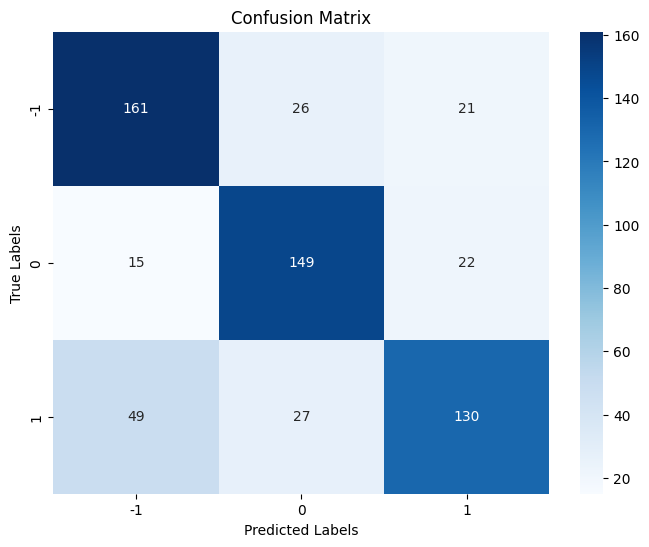

In [10]:
# 3. Classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, predictions))

# 4. Confusion matrix dalam bentuk diagram
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

cm = confusion_matrix(y_test_encoded, predictions)
plot_confusion_matrix(cm, label_encoder.classes_)

In [11]:
# Tuning menggunakan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(tfidf_train_features, y_train_encoded)

best_rf_model_grid = grid_search.best_estimator_
grid_accuracy = accuracy_score(y_test_encoded, best_rf_model_grid.predict(tfidf_test_features)) * 100
grid_f1 = f1_score(y_test_encoded, best_rf_model_grid.predict(tfidf_test_features), average='weighted') * 100




print("Akurasi Model Terbaik dari GridSearchCV:", grid_accuracy)
print("F1 Score Model Terbaik dari GridSearchCV:", grid_f1)


Akurasi Model Terbaik dari GridSearchCV: 76.0
F1 Score Model Terbaik dari GridSearchCV: 75.9552813743846


In [12]:
print("Best parameters from GridSearchCV for Random Forest:", grid_search.best_params_)

Best parameters from GridSearchCV for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# 1. Membuat model Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42)

# Melatih model
logistic_regression_model.fit(tfidf_train_features, y_train_encoded)

# Melakukan prediksi pada data uji
predictions = logistic_regression_model.predict(tfidf_test_features)

# 2. Prediksi akurasi dan F1 score dalam persen
accuracy = accuracy_score(y_test_encoded, predictions) * 100
f1 = f1_score(y_test_encoded, predictions, average='weighted') * 100

print("Akurasi Model Logistic Regression:", accuracy)
print("F1 Score Model Logistic Regression:", f1)

Akurasi Model Logistic Regression: 75.5
F1 Score Model Logistic Regression: 75.4617119740422



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       208
           1       0.75      0.77      0.76       186
           2       0.76      0.71      0.74       206

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.75       600
weighted avg       0.76      0.76      0.75       600



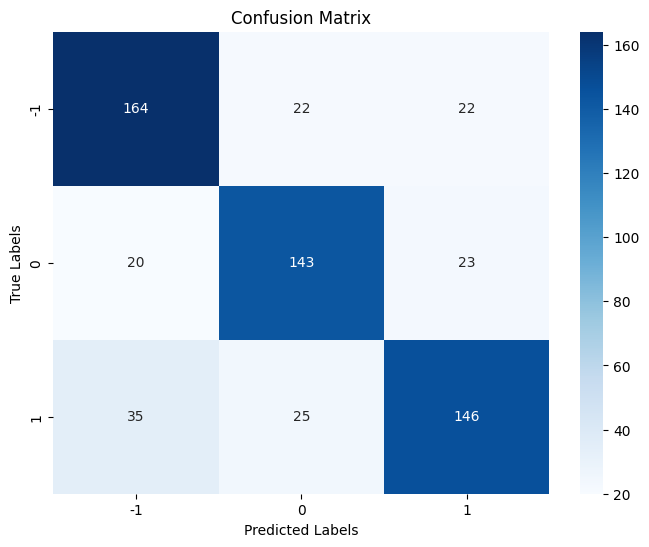

In [15]:
# 3. Classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, predictions))

# 4. Confusion matrix dalam bentuk diagram
cm = confusion_matrix(y_test_encoded, predictions)
plot_confusion_matrix(cm, label_encoder.classes_)

In [16]:
# Tuning menggunakan GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000] 
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(tfidf_train_features, y_train_encoded)

best_lr_model_grid = grid_search.best_estimator_
grid_accuracy = accuracy_score(y_test_encoded, best_lr_model_grid.predict(tfidf_test_features)) * 100
grid_f1 = f1_score(y_test_encoded, best_lr_model_grid.predict(tfidf_test_features), average='weighted') * 100

print("Akurasi Model Terbaik dari GridSearchCV:", grid_accuracy)
print("F1 Score Model Terbaik dari GridSearchCV:", grid_f1)

/home/krisna/ProjectTA/model_ta/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/krisna/ProjectTA/model_ta/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/krisna/ProjectTA/model_ta/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/

Akurasi Model Terbaik dari GridSearchCV: 75.5
F1 Score Model Terbaik dari GridSearchCV: 75.4617119740422


In [17]:
print("Best parameters from GridSearchCV for Logistic Regression:", grid_search.best_params_)

Best parameters from GridSearchCV for Logistic Regression: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
